This assignment is broken into 3 parts

Upload the notebook assignment05-population.ipynb to you assignments repository.




Author: Quyen Phan
Download the file (.csv) from CSO by selecting Both sexes, Male and Femail

Part 1 70%

Write a jupyter notebook that analyses the differences between the sexes by age in Ireland.

Weighted mean age (by sex)
The difference between the sexes by age
This part does not need to look at the regions.

ie You can take the notebook I used in the lectures and substitute the sexes for the regions.

In [68]:
import pandas as pd

df = pd.read_csv("Population.csv")
#print(df.head())

In [69]:
# Delete unnessessary columns
drop_col_list = ["Statistic Label","CensusYear","UNIT"]
df.drop(columns=drop_col_list, inplace=True)
#print(df.head())

In [70]:
# Get rid of all value in column "Single Year of Age" that are "All ages"
df = df[df["Single Year of Age"] != "All ages"]

# Change the columns "Single Year of Age"
df["Single Year of Age"] = df["Single Year of Age"].str.replace('Under 1 year', '0')
df["Single Year of Age"] = df["Single Year of Age"].str.replace('\D', '', regex=True)

# Turn the values of columns 'Single Year of Age' and 'VALUE' into integer
df['Single Year of Age']=df['Single Year of Age'].astype('int64')
df['VALUE']=df['VALUE'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9696 entries, 32 to 9791
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Sex                      9696 non-null   object
 1   Single Year of Age       9696 non-null   int64 
 2   Administrative Counties  9696 non-null   object
 3   VALUE                    9696 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 378.8+ KB


<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_2331/575249248.py:6: SyntaxWarning: invalid escape sequence '\D'
  df["Single Year of Age"] = df["Single Year of Age"].str.replace('\D', '', regex=True)


The value now is float and not integer anymore??? --> convert back to integer!
Unless you specify otherwise, Pandas will compute the mean of the VALUE column for each combination of "Single Year of Age" and "Sex". And the mean of integers is always a float. So Pandas converts the entire column to float, even if all values happen to be whole numbers.

References:
https://stackoverflow.com/questions/50100370/python-pandas-pivot-table-outputs-floats-unexpectedly



In [71]:
#
df_anal = pd.pivot_table(df,values='VALUE',
                          index="Single Year of Age",
                          columns="Sex",
                          aggfunc='sum')
#df_anal.drop(columns="Both sexes", inplace=True)
df_anal["Difference between sex: F-M"]= df_anal["Female"]-df_anal["Male"]
print (df_anal.head(10))
df_anal.info()
df_anal.to_csv("pop_for_analysis.csv")

Sex                 Both sexes  Female   Male  Difference between sex: F-M
Single Year of Age                                                        
0                       115592   56372  59220                        -2848
1                       112840   55090  57750                        -2660
2                       118420   57948  60472                        -2524
3                       120968   58966  62002                        -3036
4                       123010   59638  63372                        -3734
5                       128052   62684  65368                        -2684
6                       133428   65244  68184                        -2940
7                       138002   67144  70858                        -3714
8                       141466   68874  72592                        -3718
9                       144392   70454  73938                        -3484
<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 0 to 100
Data columns (total 4 columns):
 

Weighted mean is sum(age*population at age) / sum (populations at age)

In [72]:
import numpy as np
w_mean_Female = round(np.average(df_anal.index, weights=df_anal["Female"]),2)
w_mean_Male = round(np.average(df_anal.index, weights=df_anal["Male"]),2)
w_mean_Female
w_mean_Male

print(f"Weighted mean age (by sex): \n - Weighted mean age for Female is {w_mean_Female} \n - Weighted mean age for Male is {w_mean_Male}")

Weighted mean age (by sex): 
 - Weighted mean age for Female is 38.94 
 - Weighted mean age for Male is 37.74


References: to add horizontal axe line

https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axhline.html


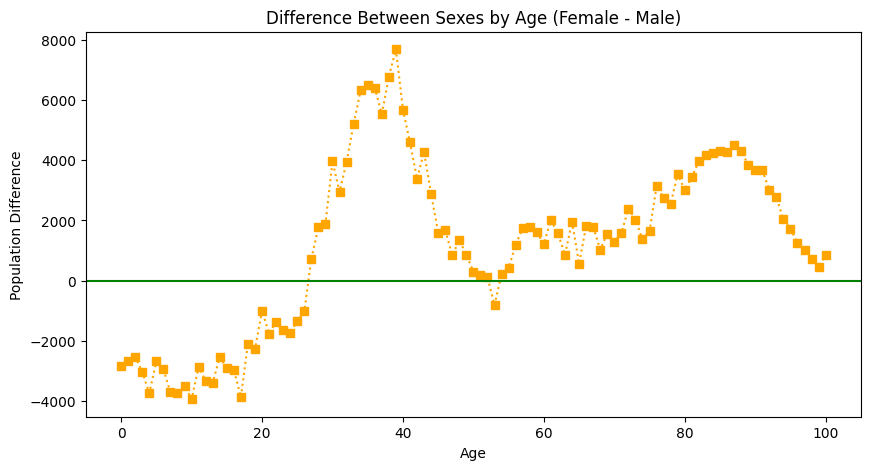

In [73]:
# The difference between the sexes by age

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(df_anal.index, df_anal['Difference between sex: F-M'], marker='s', color='orange',linestyle = 'dotted')
plt.axhline(0, color='green')
plt.title('Difference Between Sexes by Age (Female - Male)')
plt.xlabel('Age')
plt.ylabel('Population Difference')
plt.show()

Part 2 20%

In the same notebook, make a variable that stores an age (say 35).

Write that code that would group the people within 5 years of that age together, into one age group 

Calculate the population difference between the sexes in that age group.

In [74]:
# Create a variable "age_35"
age_35 = 35

# Define the min (30yo) and the max (40yo) of the age group
lower_value = age_35 - 5
upper_value = age_35 + 5

# Create an variable "age_group" that takes 2 values: "30-40" and "other ages"
def age_group(age):
    if lower_value <= age <= upper_value:
        return '30-40'
    else:
        return 'other ages'

df['age_group'] = df['Single Year of Age'].apply(age_group)

df.head()

,Sex,Single Year of Age,Administrative Counties,VALUE,age_group
32,Both sexes,0,Ireland,57796,other ages
33,Both sexes,0,Carlow County Council,699,other ages
34,Both sexes,0,Dublin City Council,6213,other ages
35,Both sexes,0,Dún Laoghaire Rathdown County Council,2457,other ages
36,Both sexes,0,Fingal County Council,4009,other ages


In [75]:
# Store the df where "age_group"='30-40' in a new df called df_30to40
df_30to40 = df[df['age_group'] == '30-40']
df_30to40.head()

,Sex,Single Year of Age,Administrative Counties,VALUE,age_group
992,Both sexes,30,Ireland,63699,30-40
993,Both sexes,30,Carlow County Council,705,30-40
994,Both sexes,30,Dublin City Council,12341,30-40
995,Both sexes,30,Dún Laoghaire Rathdown County Council,3112,30-40
996,Both sexes,30,Fingal County Council,3976,30-40


In [76]:
# Calculate the population difference between the sexes in that age group.
pop_dif = df_30to40[df_30to40["Sex"] == "Female"]['VALUE'].sum() - df_30to40[df_30to40["Sex"] == "Male"]['VALUE'].sum()

print(f"The population difference between Female and Male in the age group from 30 to 40 is: {pop_dif}")

The population difference between Female and Male in the age group from 30 to 40 is: 60952


Part 3 10%

In the same notebook.

Write the code that would work out which region in Ireland has the biggest population difference between the sexes in that age group

In [81]:
# Get rid of all value in column "Administrative Counties" that are "Ireland"
df = df[df["Administrative Counties"] != "Ireland"]
# Create a pivot table from df that region:
df_step3 = pd.pivot_table(df,values='VALUE',
                          index="Administrative Counties",
                          columns="Sex",
                          aggfunc='sum')
# Calculate the difference of population between Female and Male and store its value in column named 
df_step3["Difference F-M"]= df_step3["Female"]-df_step3["Male"]
print (df_step3.head(10))

Sex                                    Both sexes  Female    Male  \
Administrative Counties                                             
Carlow County Council                       61968   31146   30822   
Cavan County Council                        81704   40644   41060   
Clare County Council                       127938   65021   62917   
Cork City Council                          224004  114268  109736   
Cork County Council                        360152  181043  179109   
Donegal County Council                     167084   84289   82795   
Dublin City Council                        592713  300917  291796   
Dún Laoghaire Rathdown County Council      233860  121828  112032   
Fingal County Council                      330506  167974  162532   
Galway City Council                         84414   44000   40414   

Sex                                    Difference F-M  
Administrative Counties                                
Carlow County Council                             324  
Cav

In [82]:
# Find the max value of the column "Difference F-M"
max_dif = df_step3["Difference F-M"].max()
# Find the region where the max value is
reg_max_dif = df_step3["Difference F-M"].idxmax()

print(f"Region with biggest population difference between Female and Male in the age group from 30 to 40 is: {reg_max_dif} \nThe difference is: {max_dif}")

Region with biggest population difference between Female and Male in the age group from 30 to 40 is: Dún Laoghaire Rathdown County Council 
The difference is: 9796
